<a href="https://colab.research.google.com/github/nitkum41/Machine-Learning/blob/main/LSTM_Airline_univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

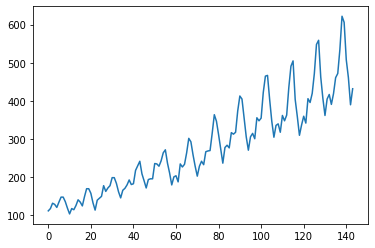

In [3]:
dataframe = read_csv('/content/AirPassengers.csv', usecols=[1])
plt.plot(dataframe)

In [5]:
#Convert pandas dataframe to numpy array
dataset = dataframe.values
dataset = dataset.astype('float32') #COnvert values to float
dataset

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [7]:
# Normalization is optional but recommended for neural network as certain 
# activation functions are sensitive to magnitude of numbers. 
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)

In [9]:
#We cannot use random way of splitting dataset into train and test as
#the sequence of events is important for time series.
#So let us take first 60% values for train and the remaining 1/3 for testing
# split into train and test sets
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [12]:
print(len(train))
print(len(test))

95
49


In [10]:
#Use TimeseriesGenerator to organize training data into the right format
#We can use a generator instead......
from keras.preprocessing.sequence import TimeseriesGenerator # Generates batches for sequence data
seq_size = length =  10 
batch_size = 1
train_generator = TimeseriesGenerator(train,train,length=length,batch_size=batch_size)
print("Total number of samples in the original training data = ", len(train)) # 95
print("Total number of samples in the generated data = ", len(train_generator)) # 55
#With length 40 it generated 55 samples, each of length 40 (by using data of length 95)

Total number of samples in the original training data =  95
Total number of samples in the generated data =  85


In [13]:
#Also generate validation data
validation_generator = TimeseriesGenerator(test, test, length=length ,batch_size=batch_size)

In [15]:
#Input dimensions are... (N x seq_size)
num_features = 1 #Univariate example

In [16]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(length, num_features)))
model.add(LSTM(50, activation='relu'))
#model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit_generator(generator=train_generator, verbose=2, epochs=100, validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
85/85 - 3s - loss: 0.0144 - val_loss: 0.0296
Epoch 2/100
85/85 - 1s - loss: 0.0098 - val_loss: 0.0278
Epoch 3/100
85/85 - 1s - loss: 0.0086 - val_loss: 0.0278
Epoch 4/100
85/85 - 1s - loss: 0.0066 - val_loss: 0.0465
Epoch 5/100
85/85 - 1s - loss: 0.0070 - val_loss: 0.0267
Epoch 6/100
85/85 - 1s - loss: 0.0066 - val_loss: 0.0280
Epoch 7/100
85/85 - 1s - loss: 0.0062 - val_loss: 0.0490
Epoch 8/100
85/85 - 1s - loss: 0.0061 - val_loss: 0.0256
Epoch 9/100
85/85 - 1s - loss: 0.0062 - val_loss: 0.0266
Epoch 10/100
85/85 - 1s - loss: 0.0064 - val_loss: 0.0273
Epoch 11/100
85/85 - 1s - loss: 0.0060 - val_loss: 0.0388
Epoch 12/100
85/85 - 1s - loss: 0.0063 - val_loss: 0.0310
Epoch 13/100
85/85 - 1s - loss: 0.0064 - val_loss: 0.0336
Epoch 14/100
85/85 - 1s - loss: 0.0065 - val_loss: 0.0242
Epoch 15/100
85/85 - 1s - loss: 0.0058 - val_loss: 0.0256
Epoch 16/100
85/85 - 1s - loss: 0.0058 - val_loss: 0.0346
Epoch 17/100
85/85 - 1s - loss: 0.0060 - val_loss: 0.0256
Epoch 18/100
85/85 - 1s

In [18]:
trainPredict = model.predict(train_generator)
testPredict = model.predict(validation_generator)

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform(train)
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform(test)


In [19]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_inverse[length:], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 0.04 RMSE


In [20]:
testScore = math.sqrt(mean_squared_error(testY_inverse[length:], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.21 RMSE


In [21]:
# shift train predictions for plotting
#we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[length:len(trainPredict)+length, :] = trainPredict

In [22]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
#testPredictPlot[len(trainPredict)+(seq_size*2)-1:len(dataset)-1, :] = testPredict
testPredictPlot[len(train)+(length)-1:len(dataset)-1, :] = testPredict


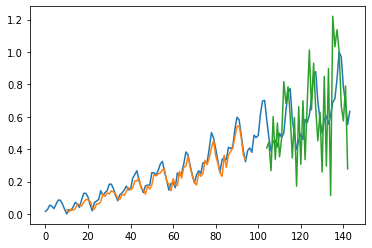

In [23]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
